<a href="https://colab.research.google.com/github/maruf9911/Machine-Learning-projects/blob/main/ML_Airline_Passenger_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fastai==2.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [3]:
train = pd.read_csv("https://raw.githubusercontent.com/behzcd/ML_projects/main/Airline_Pass_Satisfaction/train_dataset.csv", index_col='id')
test = pd.read_csv("https://raw.githubusercontent.com/behzcd/ML_projects/main/Airline_Pass_Satisfaction/test_dataset.csv", index_col='id')
submit = pd.read_csv("https://raw.githubusercontent.com/behzcd/ML_projects/main/Airline_Pass_Satisfaction/sample_submission.csv")

train.shape, test.shape

((10000, 23), (4000, 22))

In [4]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

In [6]:
train.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [7]:
train.corrwith(train['satisfaction']).abs().sort_values(ascending=False)

<ipython-input-7-27222bba04e8>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corrwith(train['satisfaction']).abs().sort_values(ascending=False)


satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.042960
Gate location                        0.007169
dtype: float64

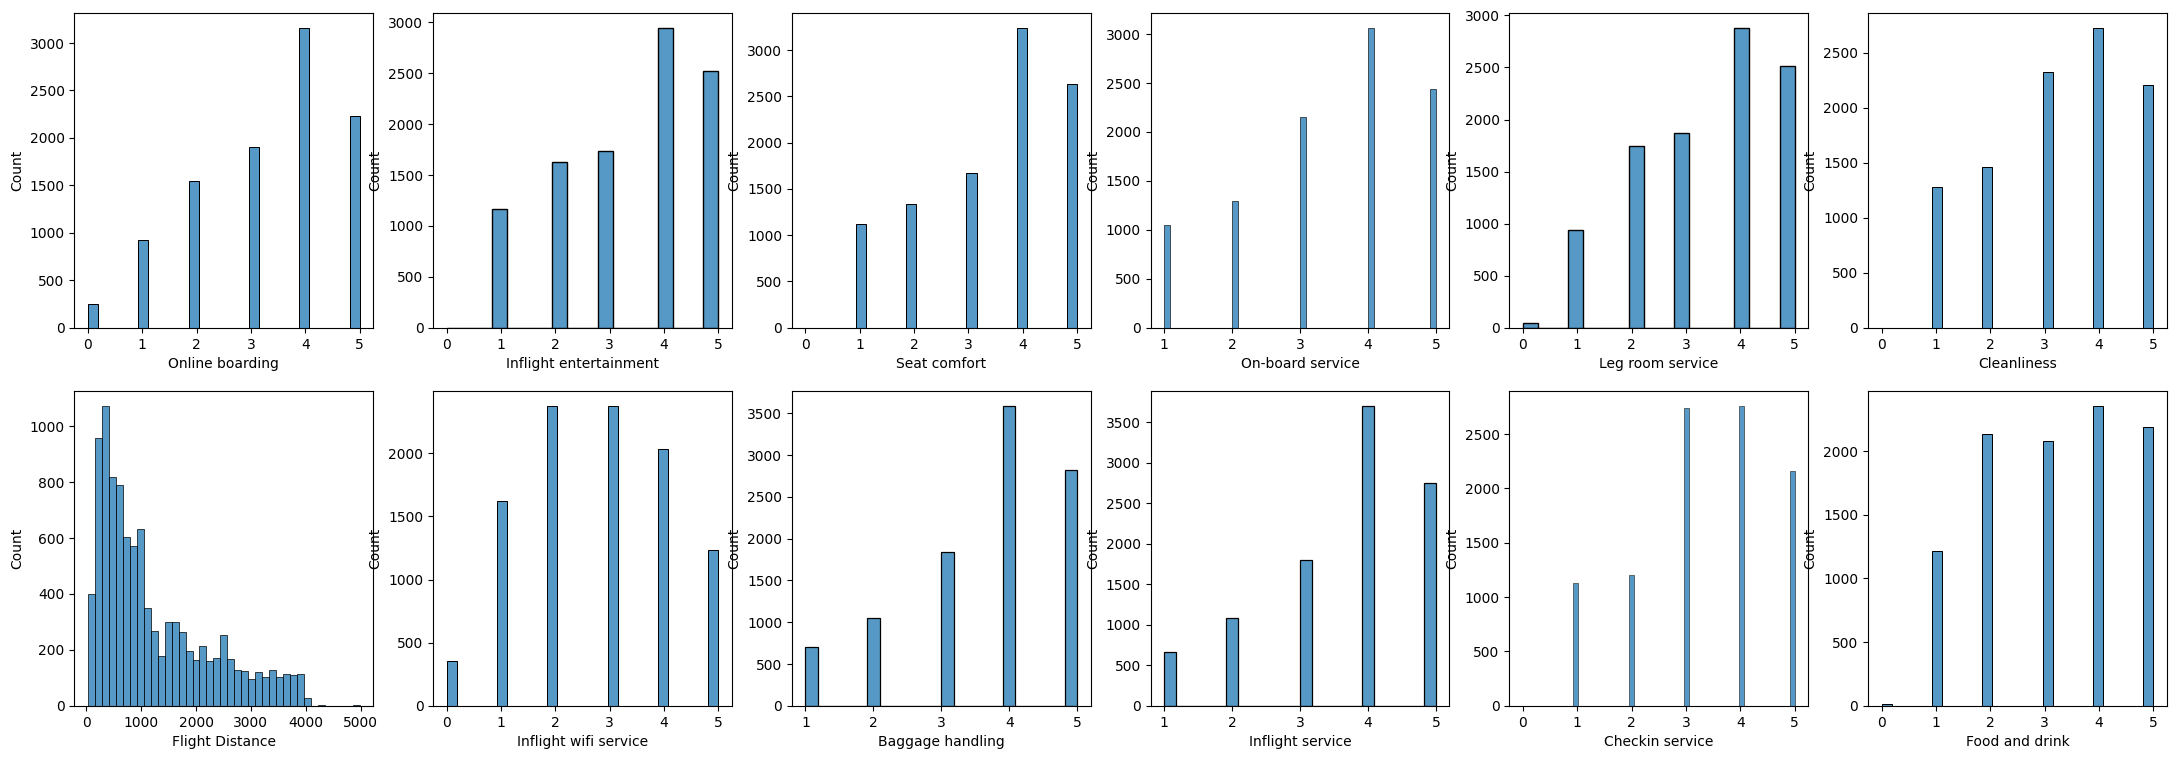

In [8]:
fig, axes = plt.subplots(2,6, figsize=(27,9))

# Online boarding
sns.histplot(x="Online boarding", data=train, ax=axes[0,0])

#Inflight entertainment
sns.histplot(x="Inflight entertainment", data=train, ax=axes[0,1])

#Seat comfort
sns.histplot(x="Seat comfort", data=train, ax=axes[0,2])

#On-board service
sns.histplot(x="On-board service", data=train, ax=axes[0,3])

#Leg room service
sns.histplot(x="Leg room service", data=train, ax=axes[0,4])

#Cleanliness
sns.histplot(x="Cleanliness", data=train, ax=axes[0,5])

#Flight Distance
sns.histplot(x="Flight Distance", data=train, ax=axes[1,0])

#Inflight wifi service
sns.histplot(x="Inflight wifi service", data=train, ax=axes[1,1])

#Baggage handling
sns.histplot(x="Baggage handling", data=train, ax=axes[1,2])

#Inflight service
sns.histplot(x="Inflight service", data=train, ax=axes[1,3])

#Checkin service
sns.histplot(x="Checkin service", data=train, ax=axes[1,4])

#Food and drink
sns.histplot(x="Food and drink", data=train, ax=axes[1,5])

plt.show()

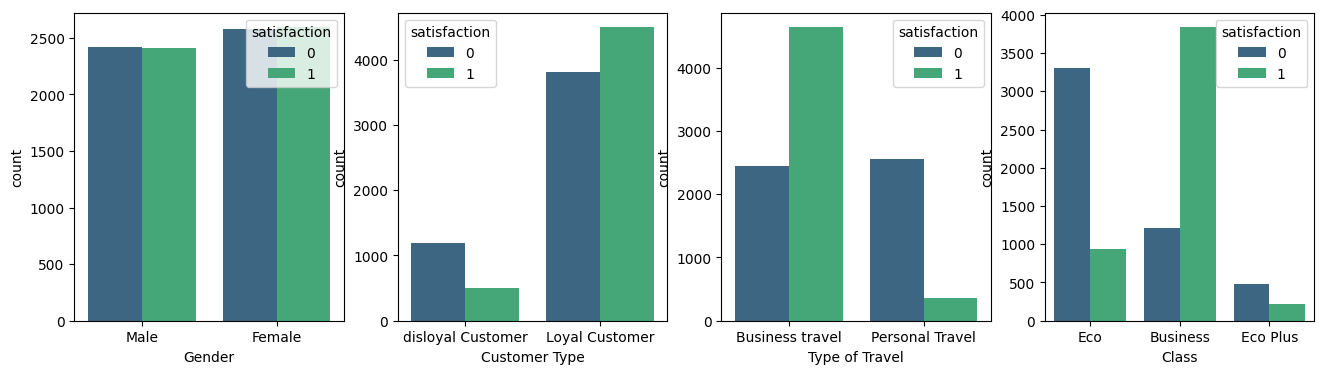

In [9]:
fig, axes = plt.subplots(1,4, figsize=(16,4))

sns.countplot(x='Gender', hue='satisfaction', palette='viridis', data=train, ax=axes[0])

sns.countplot(x='Customer Type', hue='satisfaction', palette='viridis', data=train, ax=axes[1])

sns.countplot(x='Type of Travel', hue='satisfaction', palette='viridis', data=train, ax=axes[2])

sns.countplot(x='Class', hue='satisfaction', palette='viridis', data=train, ax=axes[3])

plt.show()

In [10]:
data = train[['Online boarding', 'Inflight entertainment', 
              'Seat comfort', 'On-board service', 'Leg room service', 'Cleanliness', 
              'Flight Distance', 'Inflight wifi service', 'Baggage handling', 'Inflight service', 
              'Checkin service', 'Food and drink', 'Customer Type', 'Type of Travel', 'Class']]

In [11]:
data.isnull().sum()

Online boarding           0
Inflight entertainment    0
Seat comfort              0
On-board service          0
Leg room service          0
Cleanliness               0
Flight Distance           0
Inflight wifi service     0
Baggage handling          0
Inflight service          0
Checkin service           0
Food and drink            0
Customer Type             0
Type of Travel            0
Class                     0
dtype: int64

In [12]:
#prapering for ML
# changing the text columns to numbers

encoded = pd.get_dummies(data)
encoded.head()

,Online boarding,Inflight entertainment,Seat comfort,On-board service,Leg room service,Cleanliness,Flight Distance,Inflight wifi service,Baggage handling,Inflight service,Checkin service,Food and drink,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,,,,,,,,,,,
1,2,4,4,3,1,4,571,2,3,3,4,4,0,1,1,0,0,1,0
2,5,5,4,5,5,3,1431,4,5,5,3,3,1,0,1,0,1,0,0
3,4,1,3,1,1,2,867,1,1,1,1,4,1,0,1,0,0,1,0
4,2,2,2,4,4,2,1550,3,5,4,5,2,1,0,1,0,1,0,0
5,3,4,4,5,2,4,526,3,5,5,3,4,1,0,0,1,0,1,0


In [13]:
scaler = StandardScaler()
x = scaler.fit_transform(encoded)
y = train['satisfaction']

In [14]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

**ML**

Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.87      0.85      0.86      1000

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Model aniqligi: 0.8585


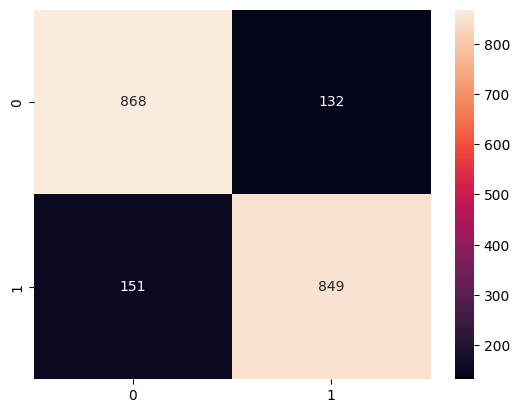

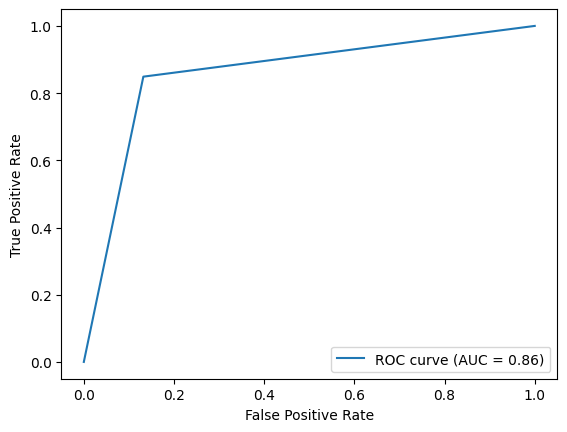

In [15]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

# Evaluating the Model
y_pred = LR_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

**Super Vector MAchine**

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1000
           1       0.94      0.92      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model accuracy: 0.9265


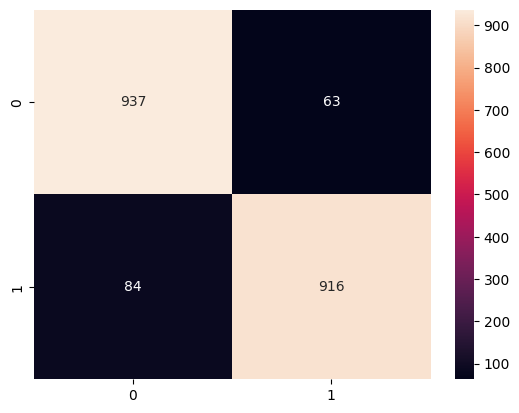

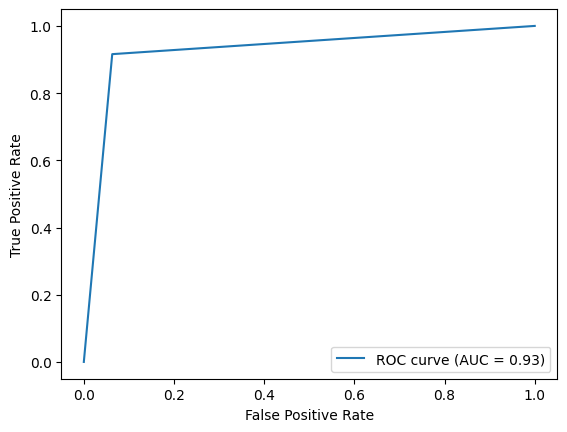

In [16]:
# Training
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Model evaluation
y_pred = svm_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

**Decision Tree**

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1000
           1       0.93      0.93      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model accuracy: 0.933


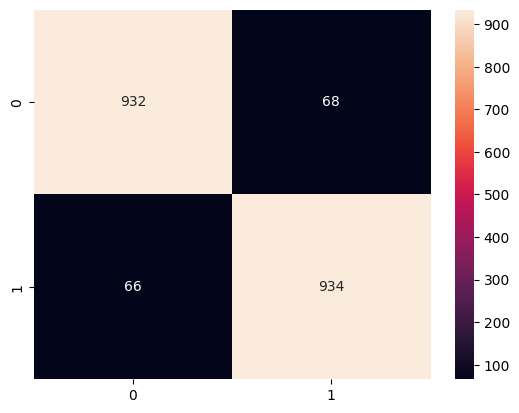

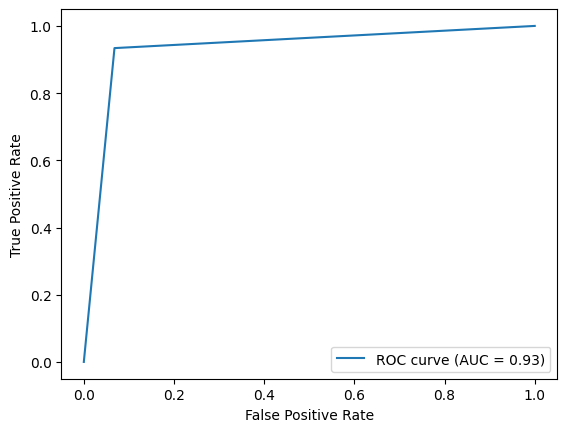

In [17]:
# Creating the maodel (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

# Evolution process 
y_pred = tree_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics. confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

**Random Forest**

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1000
           1       0.95      0.94      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.941


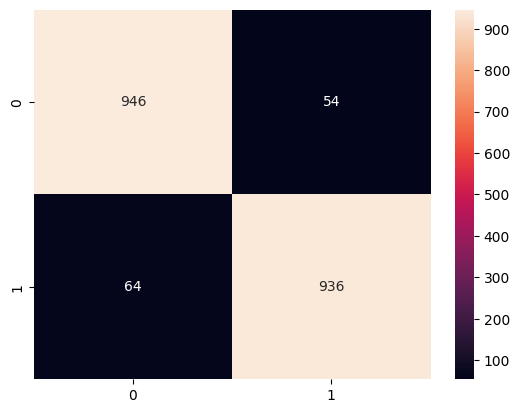

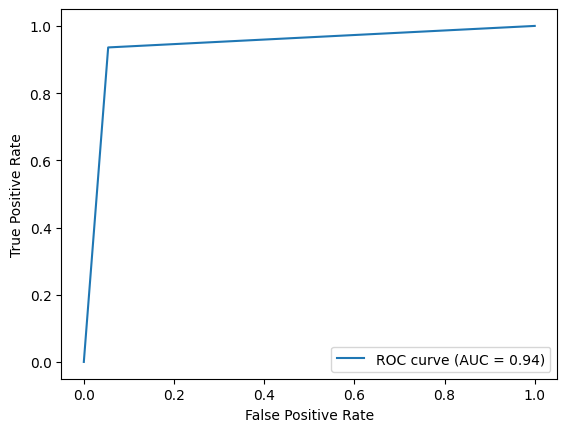

In [18]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(x_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

XGBoost

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1000
           1       0.96      0.93      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Model aniqligi: 0.9465


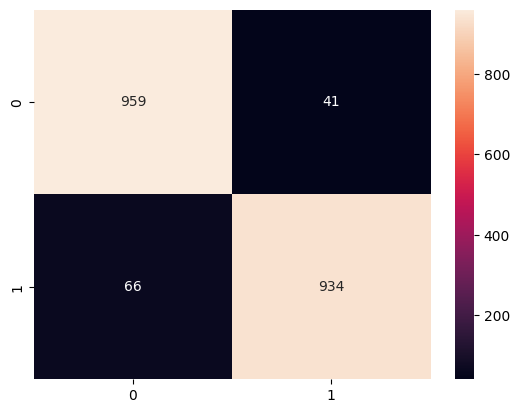

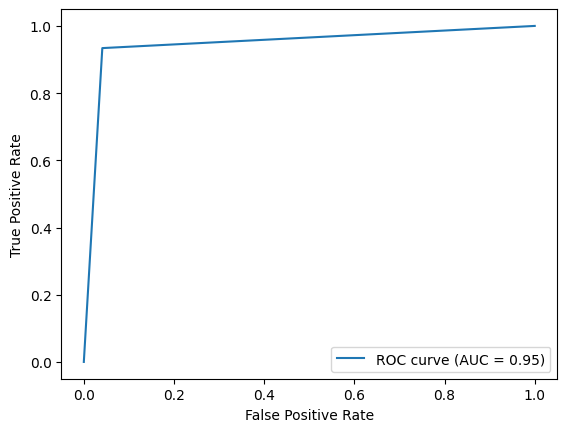

In [19]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

As we can see from the evaluation of all the algorithms which we have tested, the XGBoost gave the best result. So as the final model, we get the model made in the XGBoost.

In [20]:
data = test[['Online boarding', 'Inflight entertainment', 
              'Seat comfort', 'On-board service', 'Leg room service', 'Cleanliness', 
              'Flight Distance', 'Inflight wifi service', 'Baggage handling', 'Inflight service', 
              'Checkin service', 'Food and drink', 'Customer Type', 'Type of Travel', 'Class']]
     

In [21]:
encoded = pd.get_dummies(data)
encoded.head()

,Online boarding,Inflight entertainment,Seat comfort,On-board service,Leg room service,Cleanliness,Flight Distance,Inflight wifi service,Baggage handling,Inflight service,Checkin service,Food and drink,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,,,,,,,,,,,
1,3,2,5,4,4,5,2704,2,3,1,5,2,1,0,0,1,0,1,0
2,4,2,4,2,2,3,1623,1,2,2,4,3,1,0,1,0,1,0,0
3,5,5,5,5,5,4,338,4,5,5,4,2,1,0,1,0,1,0,0
4,0,5,1,4,4,5,95,0,1,3,3,5,1,0,1,0,0,0,1
5,5,5,5,4,5,5,602,4,4,5,5,4,1,0,0,1,0,1,0


In [22]:
#X = scaler.fit_transform(encoded)
     

In [23]:
#prediction = xgb_model.predict(X)

In [24]:
X = scaler.fit_transform(encoded)
prediction = xgb_model.predict(X)
submit['satisfaction']=prediction
submit

,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
3995,3996,1
3996,3997,0
3997,3998,0
3998,3999,1


In [25]:
submit.to_csv('prediction.csv',index=False)